In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Add ../ to path
import sys

sys.path.append('../')
import optuna
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from machinelearning.mlpipeline import MLPipelines

csv_dir = "../data/gc_mc.csv"
label = "Factor1"

mlpipe = MLPipelines(label=label, csv_dir=csv_dir)

Label mapping: {0: 'CASE', 1: 'CONTROL'}
There is no selected classifier.


Outer fold of 1 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 1 round: 33% |████▎        | Elapsed Time: 0:00:11 ETA:   0:00:23
Outer fold of 1 round: 66% |████████▋    | Elapsed Time: 0:00:19 ETA:   0:00:09
Outer fold of 1 round:100% |█████████████| Elapsed Time: 0:00:20 Time:  0:00:20


Finished with 1 round after 0.01 hours.
Finished with 12 estimators
No features were selected.


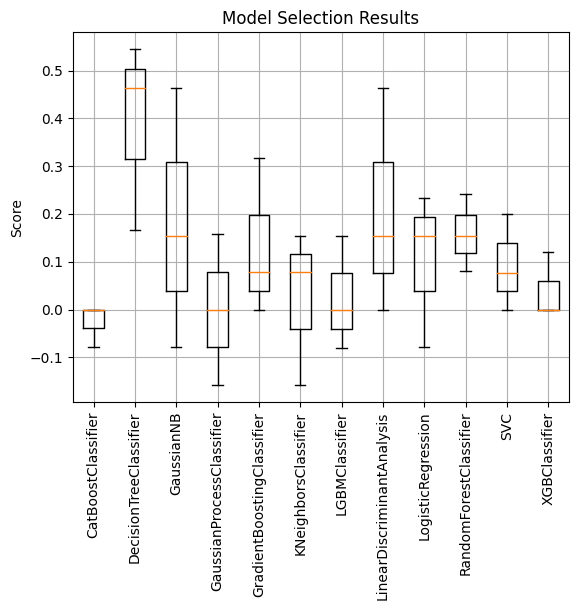

(                     Estimator                  Classifier  \
 0           CatBoostClassifier          CatBoostClassifier   
 1       DecisionTreeClassifier      DecisionTreeClassifier   
 2                   GaussianNB                  GaussianNB   
 3    GaussianProcessClassifier   GaussianProcessClassifier   
 4   GradientBoostingClassifier  GradientBoostingClassifier   
 5         KNeighborsClassifier        KNeighborsClassifier   
 6               LGBMClassifier              LGBMClassifier   
 7   LinearDiscriminantAnalysis  LinearDiscriminantAnalysis   
 8           LogisticRegression          LogisticRegression   
 9       RandomForestClassifier      RandomForestClassifier   
 10                         SVC                         SVC   
 11               XGBClassifier               XGBClassifier   
 
                                                Scores       Max       Std  \
 0                     [0.0, 0.0, -0.0778498944161523]  0.000000  0.036699   
 1   [0.544949260913066

In [14]:
exclude = ['XGBClassifier', 'GradientBoostingClassifier', 'RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier']
mlpipe.nested_cv(exclude=exclude, N=3, inner_splits=3, outer_splits=3, n_trials_ncv=2, rounds=1, feature_selection_method=None)